# Deep Learning Tutorial

We explore the essential elements of deep learning. Our goal is eventually use deep learning in computer vision problems.
Areas covered:
1. Python Libraries: Numpy, Pandas, Matplotlib
2. Intro to Keras and Tensorflow


## Numpy, Pandas, Matplotlib

In [3]:
# install requirements
import sys
!{sys.executable} -m pip install numpy pandas matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Numpy
See here for more: https://numpy.org/doc/stable/user/quickstart.html

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes.

In [8]:
a=np.array([[1., 0., 0.],
 [0., 1., 2.]])

The first axis has a length of 2, the second axis has a length of 3.
NumPy’s array class is called ndarray. It is also known by the alias array.

The more important attributes of an ndarray object are:
* ndarray.ndim - number of axes
* ndarray.shape - the dimensions of the array
* ndarray.size - the total number of elements of the array.
* ndarray.dtype - element type
* ndarray.itemsize - the size in bytes of each element of the array.
* ndarray.data - he buffer containing the actual elements


In [12]:
a.ndim,a.shape,a.size,a.dtype,a.itemsize

(2, (2, 3), 6, dtype('float64'), 8)

With numpy arrays you can perform universal operations, predefined operations, you can manipulate shape and combine them.

### Maplotlib
See here for more: https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

Note

the pyplot API is generally less-flexible than the object-oriented API. Most of the function calls you see here can also be called as methods from an Axes object. We recommend browsing the tutorials and examples to see how this works.


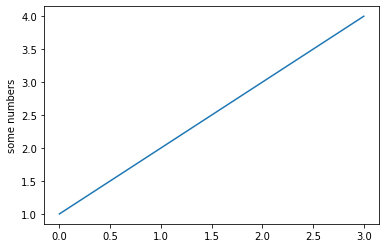

In [13]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

We can also work with mutiple figures and axes

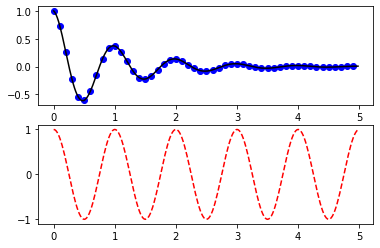

In [14]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

We can place text on the x and y axes but also the title. We can also place text on the plot and annotate shapes. The text can include TeX like notation for special math symbols

### Pandas
See here for more: https://pandas.pydata.org/pandas-docs/version/1.3/user_guide/10min.html

Pandas is a software library for python for manipulation of numerical tables and time series. The name is derived from the term "panel data".

We’ll start with a quick, non-comprehensive overview of the fundamental data structures in pandas to get you started.


**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

In [15]:
index=[1,2,3]
data=[4,5,6]
s = pd.Series(data, index=index)

Characteristics of Series:
* it is ndarray-like - Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.
* it is dict-like - A Series is like a fixed-size dict in that you can get and set values by index label

In [16]:
s[1:2]

2    5
dtype: int64

In [18]:
s[3]

6

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. It helps to think of it as column major matrix.

In [21]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "d"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
df=pd.DataFrame(d)

In [22]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,NaN,3.0
d,3.0,4.0


As with series many of the numpy method can be directly applied. Other interesting features include indexing and slicing by various means.

<Figure size 432x288 with 0 Axes>

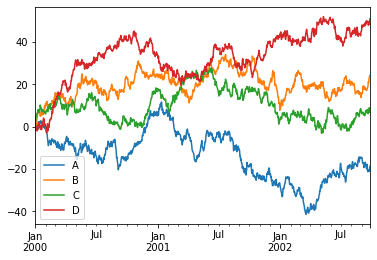

In [26]:
# plot a convenience method to plot all columns with labels
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Tensorflow and Keras

Keras comes with Tensorflow 2 which we install below. With a CUDA Nvidia card and some extra setup we can make use of the GPU. Keras is a simplified API over tensorflow which is the deep learning library.

In [29]:
!{sys.executable} -m pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached clang-5.0.tar.gz (30 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-0.14.1-py3-none-any.whl (131 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached grpcio-1.41.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cach

In [1]:
import tensorflow as tf

In [3]:
print(tf.__version__)
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print('No GPU support detected')

2.6.0
Default GPU Device:/device:GPU:0
